## **Data Science Project: Planning Stage - Srijan Ravisankar**

### **Data Description:**
#### Players Dataset:
- Number of Observations: 196
- Number of Variables: 9
- Name, Type and Description of Variables
    - experience (chr): Gaming experience of the player                      
    - subscribe (lgl): Whether the player has subscribed or not            
    - hashedEmail (chr)  : Encrypted 64-character hashcode of player's email ID
    - played_hours (dbl)  : Number of hours an individual player played         
    - name (chr): Name of the player                                  
    - gender (chr): Gender of the player                                
    - age (dbl): Age of the player                                   
    - individualId (lgl): ID of the player                                    
    - organizationName (lgl): Organization to which the player belongs            
---
#### Sessions Dataset:
- Number of Observations: 1535
- Number of Variables: 5
- Name, Type, and Description of Variables
    - hashedEmail (chr): Encrypted 64-character hashcode of player's email ID
    - start_time (chr): Start time of the player's session
    - end_time (chr): End time of the player's session
    - original_start_time (dbl): Start time of the player's session in UNIX timestamp
    - original_end_time (dbl): End time of the player's session in UNIX timestamp
---
- Issues in the data:
    - experience should be in fct
    - gender should be in fct
    - age should be in int
    - individualId and organizationName are not needed
    - UNIX timestamps are not specific enough
    - start_time and end_time are not in dttm
- Potential issues:
    - unsubscribed players have 0 playhours which could affect analysis
- How the data were collected:
    - Players Dataset: information of an individual player
    - Sessions Dataset: information of an individual session

### **Question:**
**What are the kinds of players, according to "experience", "gender" and "age", are most likely to be a "contributor" of a large amount of data?**

- Using players.csv dataset, we need to find:
    - all the kinds of experience, gender and age
    - total played_hours using group_by for each category of experience, gender and age
- Wrangling data:
    - experience should be in 'fct'
    - gender should be in 'fct'
    - age should be in 'int'

### **Exploratory Data Analysis and Visualization:**

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
# 1. reading data: reading players.csv data into R 
players_data <- read_csv("https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz")
sessions_data <- read_csv("https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB")

players_data
sessions_data

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,NA,NA
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,NA,NA
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91,NA,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [3]:
# 2. wrangling data: changing type of experience to fct
players_data <- players_data %>%
  mutate(experience = as.factor(experience),
         gender = as.factor(gender),
         age = as.integer(age))
players_data

experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<int>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,NA,NA
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,NA,NA
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91,NA,NA


experience,total_hours
<fct>,<dbl>
Amateur,379.1
Beginner,43.7
Pro,36.4
Regular,655.5
Veteran,31.1


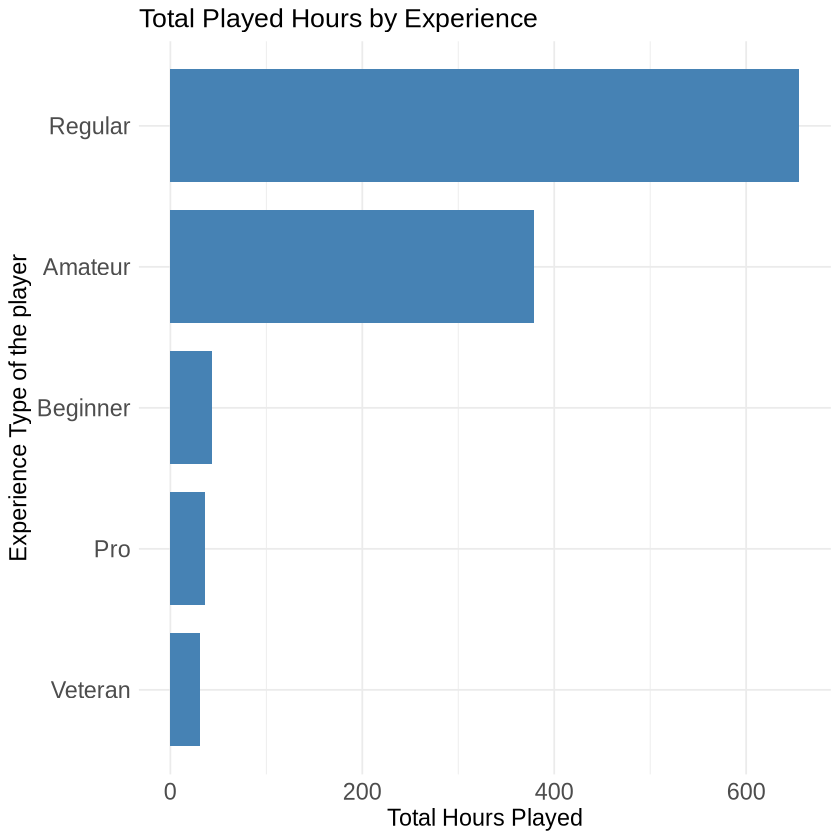

In [4]:
# 3. visualizing data:

# 3a. graphing total played hours against experience using bar chart

# finding total played hours of every types of experience
exp_hrs_data <- players_data |>
  group_by(experience) |>
  summarize(total_hours = sum(played_hours, na.rm = TRUE))
exp_hrs_data

exp_hrs_chart <- exp_hrs_data |>
  ggplot(aes(x = reorder(experience, total_hours), y = total_hours)) +
  geom_bar(stat = "identity", fill = "steelblue", width = 0.8) +
  coord_flip() +
  labs(title = "Total Played Hours by Experience",
       x = "Experience Type of the player",
       y = "Total Hours Played") +
  theme_minimal() +
  theme(
      plot.title = element_text(size = 16),
      axis.title = element_text(size = 14),
      axis.text = element_text(size = 14)
  )
exp_hrs_chart

From the graph, we can see that 'Regular' players has large number of total hours, thus contributing a large amount of data. 

gender,total_hours
<fct>,<dbl>
Agender,12.5
Female,393.5
Male,511.8
⋮,⋮
Other,0.2
Prefer not to say,4.1
Two-Spirited,0.5


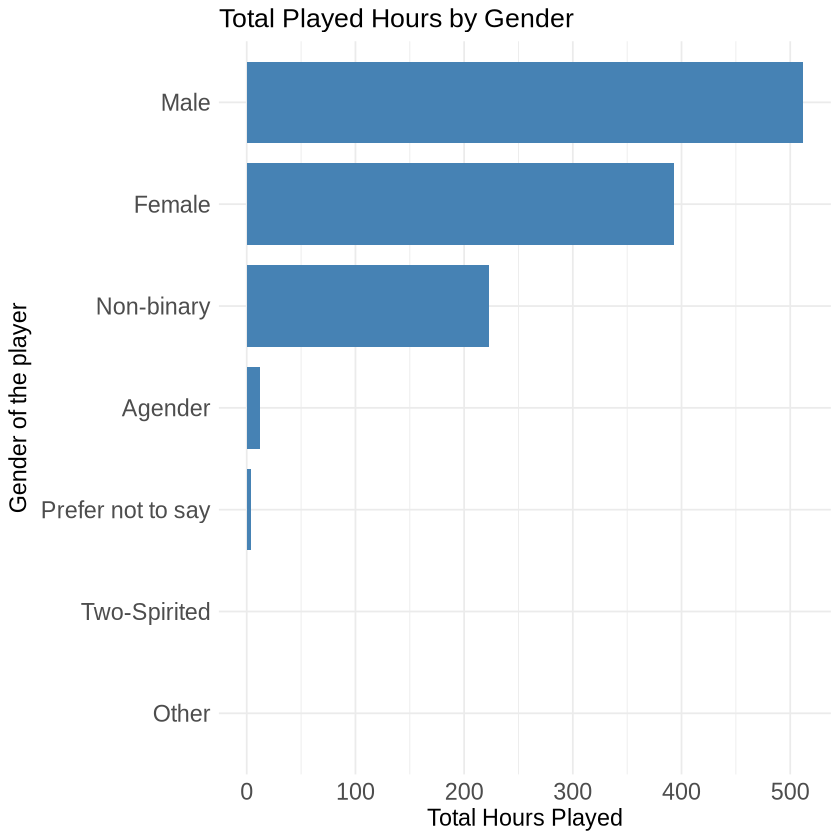

In [5]:
# 3. visualizing data:

# 3b. graphing total played hours against gender using bar chart

# finding total played hours of every types of experience
gend_hrs_data <- players_data |>
  group_by(gender) |>
  summarize(total_hours = sum(played_hours, na.rm = TRUE))
gend_hrs_data

gend_hrs_chart <- gend_hrs_data |>
  ggplot(aes(x = reorder(gender, total_hours), y = total_hours)) +
  geom_bar(stat = "identity", fill = "steelblue", width = 0.8) +
  coord_flip() +
  labs(title = "Total Played Hours by Gender",
       x = "Gender of the player",
       y = "Total Hours Played") +
  theme_minimal() +
  theme(
      plot.title = element_text(size = 16),
      axis.title = element_text(size = 14),
      axis.text = element_text(size = 14)
  )
gend_hrs_chart

From the graph, we can see that 'Male' players has large number of total hours, thus contributing a large amount of data.

age,total_hours
<int>,<dbl>
8,0.3
9,30.3
10,3.6
⋮,⋮
50,0.0
91,0.2
99,0.1


`geom_smooth()` using formula = 'y ~ x'


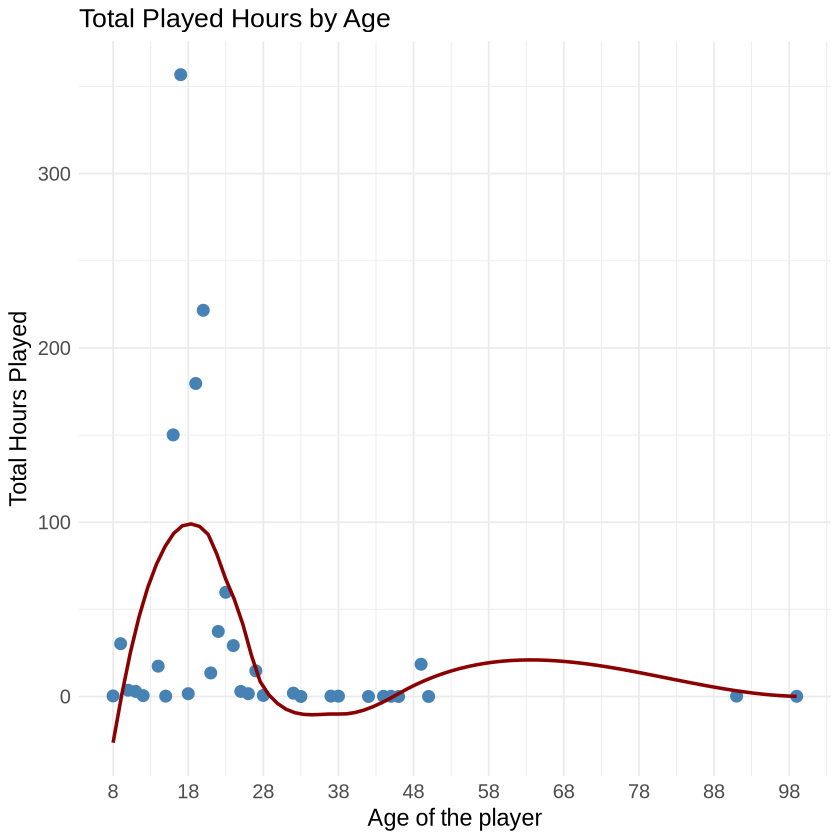

In [6]:
# 3. visualizing data:

# 3c. graphing total played hours against age using bar chart

# finding total played hours of every types of experience
age_hrs_data <- players_data |>
  group_by(age) |>
  summarize(total_hours = sum(played_hours, na.rm = TRUE))
age_hrs_data

age_hrs_chart <- age_hrs_data |>
    ggplot(aes(x = age, y = total_hours)) +
    geom_point(color = "steelblue", size = 3) +
    geom_smooth(method = "loess", color = "darkred", se = FALSE) +
    labs(title = "Total Played Hours by Age",
       x = "Age of the player",
       y = "Total Hours Played") +
    scale_x_continuous(breaks = seq(min(age_hrs_data$age), max(age_hrs_data$age), by = 10)) +
    theme_minimal() +
    theme(
        plot.title = element_text(size = 16),
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12)
    )
age_hrs_chart

From the graph, we can see that players who are around 18 years old has large number of total hours, thus contributing a large amount of data.

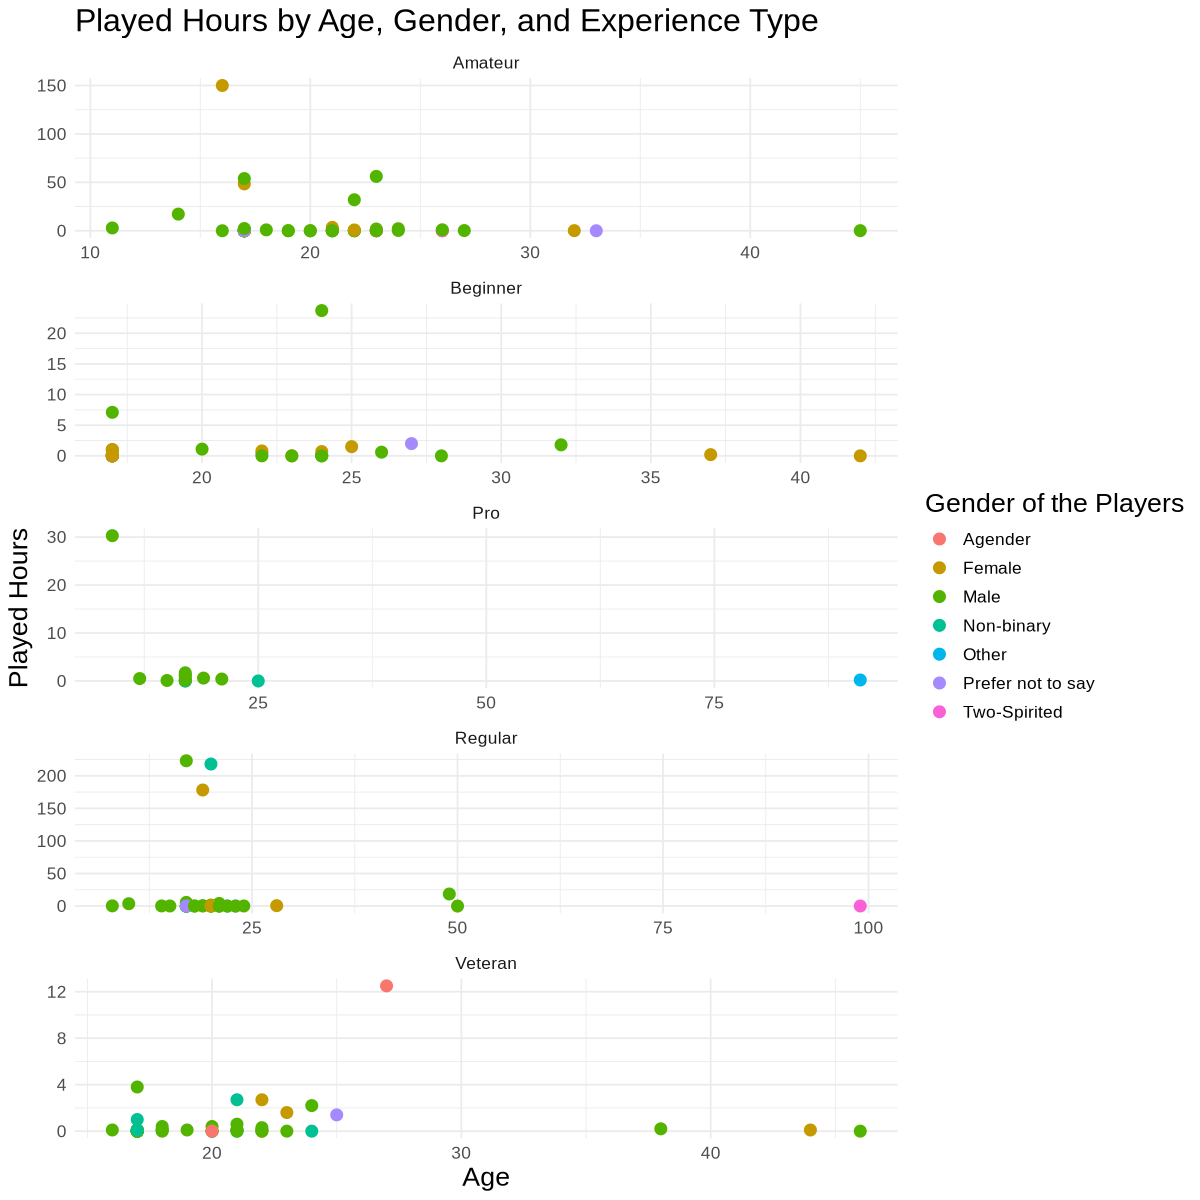

In [7]:
options(repr.plot.width = 10, repr.plot.height = 10)

exp_gend_age_chart <- ggplot(players_data, aes(x = age, y = played_hours, color = gender)) +
  geom_point(size = 3) +
  facet_wrap(~ experience, scales = "free", ncol = 1, labeller = label_wrap_gen(width = 10)) +
  labs(title = "Played Hours by Age, Gender, and Experience Type",
       x = "Age",
       y = "Played Hours",
       color = "Gender of the Players") +
  theme_minimal() +
  theme(
    title = element_text(size = 16),
    text = element_text(size = 13)
  )

exp_gend_age_chart

From the graph, we can see that three regular players who are male, female and non-binary have large number of total hours over 150 hours unlike other experience types, thus contributing a large amount of data. Also, male players have contributed largely across all experience type.

### **Methods and Plan:**
- Method: Binary Classification using knn algorithm
- Reason for choosing the method: We are predicting, when given an individual player's data, whether they will contribute a large amount of data. There are only two categorical outcomes: True or False. Therefore, Binary Classification is the appropriate method.
- Assumptions: players fall into one of the existing experience and gender categories
- Potential limitations:
    - may not perform well as the data gets larger
    - may not perform well with large number of predictors
    - may not perform well when class 
- Process:
    - Comparison: Compare the given dataset of an individual player against against all existing data according to experience, gender and age
    - Algorithm: K-nearest neighbors classification algorithm
    - Splitting: Training Set and Test Set
    - Split proportion: 7.5:2.5; that is, 75% of data (147 individuals) for training set and 30% data for test set (49 individuals)
    - Cross validation: 5-fold cross validation using stratification   